In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

In [ ]:
# !kaggle competitions download -c anticipating-latency-in-cloud-environments

 65% 1.00M/1.53M [00:00<00:00, 1.51MB/s]
100% 1.53M/1.53M [00:00<00:00, 2.10MB/s]


In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile('/content/anticipating-latency-in-cloud-environments.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_t = pd.read_csv('/content/training_data.csv')

In [ ]:
train_t.head(2)
-

SyntaxError: invalid syntax (<ipython-input-200-a20f914d7914>, line 2)

In [ ]:
train = pd.read_csv('/content/training_data.csv')
test = pd.read_csv('/content/testing_data.csv')

In [ ]:
train['cpu_type'].unique()

In [ ]:
import pandas as pd

# List of CPU types
cpu_list = [
    'Intel Xeon Gold 5317', 'AMD EPYC 72F3', 'Intel Xeon Platinum 8380', 'Intel Xeon Platinum 8356H',
    'AMD Ryzen 7 5700G', 'Intel Core i5-11600KF', 'AMD Ryzen 5 5500U', 'Intel Core i5-11500', 'AMD EPYC 7443P',
    'Intel Xeon Platinum 8360HL', 'AMD EPYC 7313', 'Intel Xeon Gold 6342', 'AMD Ryzen 7 5800HS',
    'Intel Xeon Platinum 8354H', 'Intel Xeon Gold 6338T', 'Intel Xeon Platinum 8360Y', 'Intel Core i3-10105F',
    'AMD EPYC 7713P', 'Intel Xeon Gold 6312U', 'AMD EPYC 7313P', 'Intel Core i7-11700F', 'Intel Core i9-11900KF',
    'Intel Xeon Silver 4316', 'AMD Ryzen 3 5300G', 'Intel Xeon Platinum 8353H', 'Intel Xeon Platinum 8376H',
    'Intel Core i5-11400T', 'Intel Core i3-10105T', 'Intel Core i5-11400', 'Intel Xeon Platinum 8368',
    'Intel Core i3-10325', 'Intel Xeon Gold 6354', 'Intel Xeon Platinum 8380HL', 'AMD EPYC 7663',
    'Intel Xeon Gold 6346', 'Intel Core i3-10105', 'Intel Pentium Gold G6505T', 'AMD Ryzen 9 5900HX',
    'Intel Xeon Platinum 8368Q', 'Intel Pentium Gold G6405', 'Intel Xeon Platinum 8352V', 'Intel Core i9-11900T',
    'Intel Xeon Gold 5318Y', 'AMD Ryzen 9 5980HS', 'Intel Xeon Platinum 8360H', 'Intel Xeon Gold 5318S',
    'Intel Pentium Gold G6405T', 'Intel Xeon Silver 4310T', 'Intel Xeon Gold 5315Y', 'AMD EPYC 7343',
    'Intel Xeon Gold 5320H', 'Intel Core i5-11500T', 'Intel Xeon Platinum 8352M', 'Intel Core i3-10305T',
    'Intel Xeon Silver 4310', 'Intel Core i7-11700KF', 'Intel Xeon Gold 6348', 'AMD EPYC 7443', 'AMD EPYC 74F3',
    'AMD EPYC 7713', 'Intel Xeon Gold 6326', 'Intel Core i3-10305', 'Intel Core i5-11600', 'AMD EPYC 75F3',
    'Intel Xeon Gold 6330', 'Intel Core i5-11600T', 'Intel Xeon Gold 6334', 'Intel Xeon Gold 5320', 'Intel Core i7-11700K',
    'Intel Xeon Gold 6336Y', 'Intel Xeon Gold 6348H', 'Intel Core i9-11900K', 'AMD EPYC 7453', 'Intel Xeon Gold 6328H',
    'Intel Xeon Gold 6314U', 'AMD EPYC 7643', 'Intel Xeon Platinum 8358', 'Intel Xeon Gold 5318H', 'AMD EPYC 7543P',
    'Intel Xeon Gold 5318N', 'Intel Xeon Gold 6338N', 'AMD Ryzen 7 5800H', 'Intel Xeon Gold 6328HL',
    'Intel Pentium Gold G6505', 'Intel Xeon Platinum 8351N', 'AMD EPYC 7513', 'AMD EPYC 7543', 'Intel Pentium Gold G6605',
    'Intel Core i7-11700T', 'AMD EPYC 73F3', 'Intel Xeon Platinum 8362', 'Intel Xeon Gold 5320T', 'Intel Core i9-11900F',
    'Intel Xeon Platinum 8358P', 'Intel Core i7-11700', 'Intel Xeon Silver 4309Y', 'Intel Xeon Gold 6330H',
    'Intel Xeon Platinum 8380H', 'Intel Xeon Silver 4314', 'Intel Core i9-11900', 'Intel Core i5-11600K', 'AMD Ryzen 5 5600G',
    'Intel Xeon Platinum 8352S', 'Intel Core i5-11400F', 'AMD EPYC 7413', 'Intel Xeon Platinum 8376HL', 'AMD EPYC 7763'
]

# Sample core and speed data (replace with actual data)
cpu_data = {
    'Intel Xeon Gold 5317': (8, 3.0), 'AMD EPYC 72F3': (24, 3.2), 'Intel Xeon Platinum 8380': (40, 2.3),
    'Intel Xeon Platinum 8356H': (20, 3.9), 'AMD Ryzen 7 5700G': (8, 3.8), 'Intel Core i5-11600KF': (6, 3.9),
    'AMD Ryzen 5 5500U': (6, 2.1), 'Intel Core i5-11500': (6, 2.7), 'AMD EPYC 7443P': (24, 2.85),
    'Intel Xeon Platinum 8360HL': (28, 3.1), 'AMD EPYC 7313': (16, 3.0), 'Intel Xeon Gold 6342': (24, 2.8),
    'AMD Ryzen 7 5800HS': (8, 3.2), 'Intel Xeon Platinum 8354H': (18, 3.8), 'Intel Xeon Gold 6338T': (20, 3.2),
    'Intel Xeon Platinum 8360Y': (28, 2.4), 'Intel Core i3-10105F': (4, 3.7), 'AMD EPYC 7713P': (64, 2.0),
    'Intel Xeon Gold 6312U': (12, 2.4), 'AMD EPYC 7313P': (16, 3.0), 'Intel Core i7-11700F': (8, 2.5),
    'Intel Core i9-11900KF': (8, 3.5), 'Intel Xeon Silver 4316': (12, 2.3), 'AMD Ryzen 3 5300G': (4, 3.6),
    'Intel Xeon Platinum 8353H': (18, 3.9), 'Intel Xeon Platinum 8376H': (28, 3.6), 'Intel Core i5-11400T': (6, 1.3),
    'Intel Core i3-10105T': (4, 3.0), 'Intel Core i5-11400': (6, 2.6), 'Intel Xeon Platinum 8368': (38, 3.4),
    'Intel Core i3-10325': (4, 3.9), 'Intel Xeon Gold 6354': (18, 3.0), 'Intel Xeon Platinum 8380HL': (28, 3.6),
    'AMD EPYC 7663': (56, 2.0), 'Intel Xeon Gold 6346': (16, 3.0), 'Intel Core i3-10105': (4, 3.7),
    'Intel Pentium Gold G6505T': (2, 3.5), 'AMD Ryzen 9 5900HX': (8, 3.3), 'Intel Xeon Platinum 8368Q': (38, 3.3),
    'Intel Pentium Gold G6405': (2, 4.0), 'Intel Xeon Platinum 8352V': (18, 2.5), 'Intel Core i9-11900T': (8, 1.5),
    'Intel Xeon Gold 5318Y': (24, 2.1), 'AMD Ryzen 9 5980HS': (8, 3.0), 'Intel Xeon Platinum 8360H': (24, 3.0),
    'Intel Xeon Gold 5318S': (18, 3.7), 'Intel Pentium Gold G6405T': (2, 3.5), 'Intel Xeon Silver 4310T': (10, 2.3),
    'Intel Xeon Gold 5315Y': (8, 2.5), 'AMD EPYC 7343': (16, 3.2), 'Intel Xeon Gold 5320H': (24, 3.4),
    'Intel Core i5-11500T': (6, 2.3), 'Intel Xeon Platinum 8352M': (18, 3.0), 'Intel Core i3-10305T': (4, 3.0),
    'Intel Xeon Silver 4310': (16, 2.5), 'Intel Core i7-11700KF': (8, 2.5), 'Intel Xeon Gold 6348': (18, 3.1),
    'AMD EPYC 7443': (24, 2.85), 'AMD EPYC 74F3': (24, 3.2), 'AMD EPYC 7713': (64, 2.0), 'Intel Xeon Gold 6326': (16, 3.0),
    'Intel Core i3-10305': (4, 3.8), 'Intel Core i5-11600': (6, 3.1), 'AMD EPYC 75F3': (32, 2.95),
    'Intel Xeon Gold 6330': (28, 2.0), 'Intel Core i5-11600T': (6, 2.3), 'Intel Xeon Gold 6334': (24, 2.5),
    'Intel Xeon Gold 5320': (24, 3.0), 'Intel Core i7-11700K': (8, 3.6), 'Intel Xeon Gold 6336Y': (24, 2.5),
    'Intel Xeon Gold 6348H': (20, 3.0), 'Intel Core i9-11900K': (8, 3.7), 'AMD EPYC 7453': (32, 2.75),
    'Intel Xeon Gold 6328H': (24, 3.2), 'Intel Xeon Gold 6314U': (16, 2.4), 'AMD EPYC 7643': (48, 2.4),
    'Intel Xeon Platinum 8358': (32, 2.5), 'Intel Xeon Gold 5318H': (18, 3.0), 'AMD EPYC 7543P': (32, 2.8),
    'Intel Xeon Gold 5318N': (24, 2.1), 'Intel Xeon Gold 6338N': (24, 2.2), 'AMD Ryzen 7 5800H': (8, 2.8),
    'Intel Xeon Gold 6328HL': (18, 2.5), 'Intel Pentium Gold G6505': (2, 3.5), 'Intel Xeon Platinum 8351N': (28, 3.3),
    'AMD EPYC 7513': (32, 2.6), 'AMD EPYC 7543': (32, 2.85), 'Intel Pentium Gold G6605': (2, 4.0),
    'Intel Core i7-11700T': (8, 1.4), 'AMD EPYC 73F3': (16, 3.5), 'Intel Xeon Platinum 8362': (32, 2.6),
    'Intel Xeon Gold 5320T': (20, 2.8), 'Intel Core i9-11900F': (8, 2.5), 'Intel Xeon Platinum 8358P': (24, 3.1),
    'Intel Core i7-11700': (8, 3.6), 'Intel Xeon Silver 4309Y': (8, 2.8), 'Intel Xeon Gold 6330H': (24, 3.4),
    'Intel Xeon Platinum 8380H': (28, 3.6), 'Intel Xeon Silver 4314': (10, 2.4), 'Intel Core i9-11900': (8, 3.5),
    'Intel Core i5-11600K': (6, 2.8), 'AMD Ryzen 5 5600G': (6, 2.9), 'Intel Xeon Platinum 8352S': (18, 3.3),
    'Intel Core i5-11400F': (6, 2.6), 'AMD EPYC 7413': (24, 2.65), 'Intel Xeon Platinum 8376HL': (28, 3.0),
    'AMD EPYC 7763': (64, 2.45)
}

# Create DataFrame

train['Cores'] = train['cpu_type'].map(lambda x: cpu_data[x][0])
train['Speed'] = train['cpu_type'].map(lambda x: cpu_data[x][1])

test['Cores'] = test['cpu_type'].map(lambda x: cpu_data[x][0])
test['Speed'] = test['cpu_type'].map(lambda x: cpu_data[x][1])



In [ ]:
train.head(1)

,ID,timestamp,cpu_type,cpu_limit,ram_limit,cpu_usage,ram_usage,num_req,conc_lvl,latency,Cores,Speed
0,2714,2021-11-04 23:15:38,Intel Xeon Gold 5317,2.0,70M,0.08445,46854144.0,100,71,7429000,8,3.0


In [ ]:
# clean the limite col



def convert_ram_limit(df):
  df['ram_limit'] = df['ram_limit'].str[:-1].astype(int)

convert_ram_limit(train)
convert_ram_limit(test)


In [ ]:
# date cleaining

train['year'] = pd.to_datetime(train['timestamp']).dt.year
train['month'] = pd.to_datetime(train['timestamp']).dt.month
train['day'] = pd.to_datetime(train['timestamp']).dt.day
train['hour'] = pd.to_datetime(train['timestamp']).dt.hour

test['year'] = pd.to_datetime(test['timestamp']).dt.year
test['month'] = pd.to_datetime(test['timestamp']).dt.month
test['day'] = pd.to_datetime(test['timestamp']).dt.day
test['hour'] = pd.to_datetime(test['timestamp']).dt.hour




In [ ]:
train.head()

,ID,timestamp,cpu_type,cpu_limit,ram_limit,cpu_usage,ram_usage,num_req,conc_lvl,latency,Cores,Speed,year,month,day,hour
0,2714,2021-11-04 23:15:38,Intel Xeon Gold 5317,2.0,70,0.084450,46854144.0,100,71,7429000,8,3.0,2021,11,4,23
1,38113,2021-11-04 23:23:27,AMD EPYC 72F3,2.0,70,0.277893,55934976.0,300,21,2196000,24,3.2,2021,11,4,23
2,33409,2021-11-11 13:32:59,Intel Xeon Platinum 8380,2.5,66,0.351042,59109376.0,700,1,37000,40,2.3,2021,11,11,13
3,10123,2022-03-19 02:35:05,Intel Xeon Platinum 8356H,0.8,768,0.026230,43659264.0,100,41,3946000,20,3.9,2022,3,19,2
4,12815,2022-03-17 06:30:29,AMD EPYC 72F3,0.4,512,0.108346,51048448.0,800,51,5084000,24,3.2,2022,3,17,6


In [ ]:
# prompt: TRASNFORME CPY8TYPE TO NUMIRACL VALS

train['cpu_type'] = train['cpu_type'].astype('category')
train['cpu_type'] = train['cpu_type'].cat.codes

test['cpu_type'] = test['cpu_type'].astype('category')
test['cpu_type'] = test['cpu_type'].cat.codes

train.head()


,ID,timestamp,cpu_type,cpu_limit,ram_limit,cpu_usage,ram_usage,num_req,conc_lvl,latency,year,month,day,hour
0,2714,2021-11-04 23:15:38,58,2.0,70,0.084450,46854144.0,100,71,7429000,2021,11,4,23
1,38113,2021-11-04 23:23:27,0,2.0,70,0.277893,55934976.0,300,21,2196000,2021,11,4,23
2,33409,2021-11-11 13:32:59,99,2.5,66,0.351042,59109376.0,700,1,37000,2021,11,11,13
3,10123,2022-03-19 02:35:05,88,0.8,768,0.026230,43659264.0,100,41,3946000,2022,3,19,2
4,12815,2022-03-17 06:30:29,0,0.4,512,0.108346,51048448.0,800,51,5084000,2022,3,17,6


In [ ]:
train=train.drop('timestamp',axis=1)

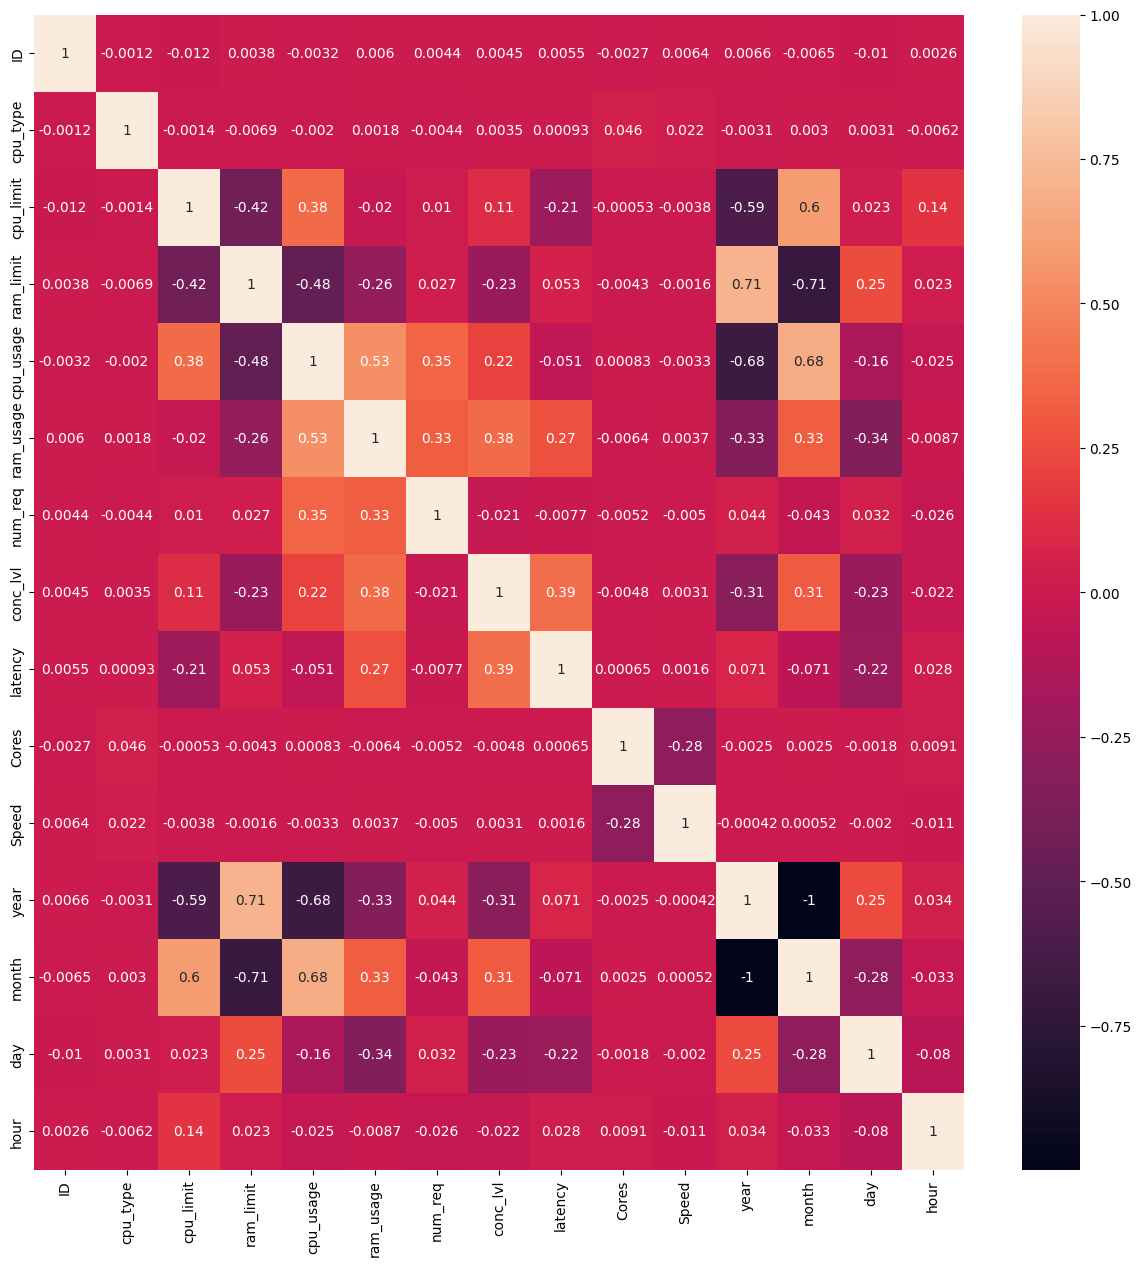

In [ ]:
# prompt: show the corr of the dataset  using heat map make it bigger the map

import matplotlib.pyplot as plt
import seaborn as sns

corr = train.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)
plt.show()


In [ ]:
train.head(2)

,ID,cpu_type,cpu_limit,ram_limit,cpu_usage,ram_usage,num_req,conc_lvl,latency,Cores,Speed,month,day,hour
0,2714,58,2.0,70,0.084450,46854144.0,100,71,7429000,8,3.0,11,4,23
1,38113,0,2.0,70,0.277893,55934976.0,300,21,2196000,24,3.2,11,4,23


In [ ]:
train=train=train.drop('year',axis=1)

In [ ]:
# prompt: splite the data to train and test

from sklearn.model_selection import train_test_split
train_d=train.drop(['timestamp','cpu_type'], axis=1)#,'cpu_type','Cores','Speed'
test_d=test.drop(['timestamp','cpu_type'], axis=1)#,'cpu_type','Cores','Speed'


X = train_d.drop('latency', axis=1)
y = train_d['latency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# prompt: train my data on 3 difrent model s and give the acc on the R2

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train three different models
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Predict on the test set
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

# Calculate R2 scores
r2_score1 = r2_score(y_test, y_pred1)
r2_score2 = r2_score(y_test, y_pred2)
r2_score3 = r2_score(y_test, y_pred3)

# Print the results
print("Linear Regression R2 score:", r2_score1)
print("Decision Tree Regressor R2 score:", r2_score2)
print("Random Forest Regressor R2 score:", r2_score3)


Linear Regression R2 score: 0.2638536522221848
Decision Tree Regressor R2 score: 0.9566138958234007
Random Forest Regressor R2 score: 0.9723408917930961


In [ ]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [ ]:
y=model.predict(test_d)
y = y.astype(int)
sub = pd.DataFrame({'ID': test['ID'], 'latency': y})
sub.to_csv('submission.csv', index=False)

In [ ]:
# prompt: divese the  num_req on 100

train['num_req'] = train['num_req'] / 100
test['num_req'] = test['num_req'] / 100
